# ***특성공학***

이전 예제에서 2차 방정식으로 다중 회귀를 한 결과, 테스트 점수가 더 높은 과소적합이 발생했다.

이 문제를 해결하기 위해서는 **제곱보다 더 고차항**을 넣어야한다.

따라서 이번 예제에서는 농어의 길이뿐만 아니라 농어의 높이와 두께도 함께 사용하고자한다.

또한 이전 절에서처럼 3개의 특성을 가각 제곱하여 추가하고 각 특성을 서로 곱해서 또 다른 특성을 만든다.

이렇게 기존 특성을 사용하여 새로운 특성을 만드는 것을 **특성 공학**이라고 부른다.

In [2]:
import pandas as pd
perch_full = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [3]:
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [4]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

# **사이킷런의 변환기**

사이킷런은 *특성을 만들거나 전처리 하기 위한 클래스*를 제공하는데, 이를 **변환기** 라고 한다.

fit(훈련) -> transform(변환)

In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [19]:
# 2개의 특성(2와 3)으로 이루어진 샘플을 변환기를 적용해보는 연습
poly = PolynomialFeatures()
poly.fit([[2,3]])

# 1 / 2 / 3 / 2와 3을 각각 제곱한 값 / 2 곱하기 3
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


In [21]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [22]:
# 9개의 특성이 어떻게 만들어졌는지 확인하는 방법
poly.get_feature_names_out()

array(['length', ' height', ' width', 'length^2', 'length  height',
       'length  width', ' height^2', ' height  width', ' width^2'],
      dtype=object)

In [23]:
test_poly = poly.transform(test_input)

다중 회귀 모델을 훈련하는 것 = 선형 회귀 모델을 훈련하는 것

다만 여러 개의 특성을 사용하여 선형 회귀를 수행하는 것 뿐임.

In [24]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982125
0.9714559911594111


훈련 세트에 대한 점수가 매우 높아진 모습 !

테스트 세트에 대한 점수는 높아지지 않았지만 과소적합 문제 해결.

In [25]:
# 특성을 추가하여 5제곱까지 특성을 만들기
poly = PolynomialFeatures(degree = 5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [26]:
poly.get_feature_names_out()

array(['length', ' height', ' width', 'length^2', 'length  height',
       'length  width', ' height^2', ' height  width', ' width^2',
       'length^3', 'length^2  height', 'length^2  width',
       'length  height^2', 'length  height  width', 'length  width^2',
       ' height^3', ' height^2  width', ' height  width^2', ' width^3',
       'length^4', 'length^3  height', 'length^3  width',
       'length^2  height^2', 'length^2  height  width',
       'length^2  width^2', 'length  height^3', 'length  height^2  width',
       'length  height  width^2', 'length  width^3', ' height^4',
       ' height^3  width', ' height^2  width^2', ' height  width^3',
       ' width^4', 'length^5', 'length^4  height', 'length^4  width',
       'length^3  height^2', 'length^3  height  width',
       'length^3  width^2', 'length^2  height^3',
       'length^2  height^2  width', 'length^2  height  width^2',
       'length^2  width^3', 'length  height^4', 'length  height^3  width',
       'length  height^2

In [28]:
lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9999999999996433
-144.40579436844948


**특성의 개수를 크게 늘리면 선형 모델은 매우매우 강력**해진다.

-> 훈련 세트에 대해서는 완벽하게 학습하지만 테스트 세트에서는 성능이 크게 낮아진다.

--> ***과대적합*** 발생

# ***규제***



> **규제**는 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 하는 것
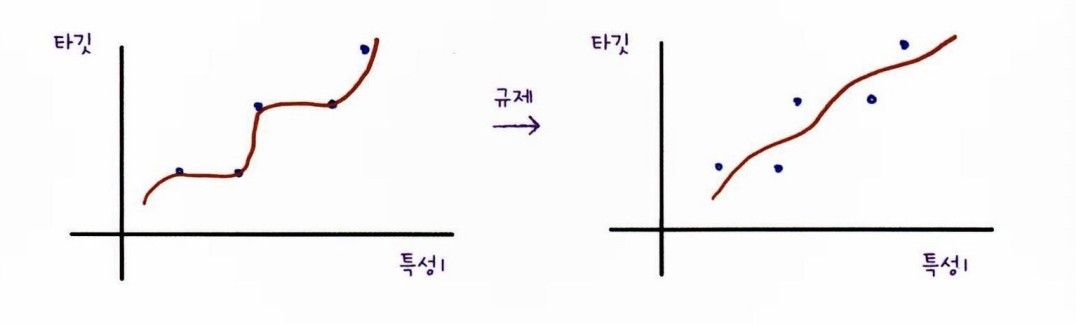


일반적으로 선형 회귀 모델에 규제를 적용할 때 계수 값의 크기가 서로 많이 다르면 공정하게 제어되지 못함.

-> 규제를 적용하기 전에 정규화를 먼저 진행 !!

# 릿지 회귀

In [35]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

선형 회귀 모델에 규제를 적용한 모델을 **릿지** & **라쏘**라고 한다.

릿지 : 계수를 제곱한 값을 기준으로 규제 적용

라쏘 : 계수의 절댓값을 기준으로 규제를 적용

In [38]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615387


In [39]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델 생성
    ridge = Ridge(alpha=alpha)
    # 릿지 모델 훈련
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

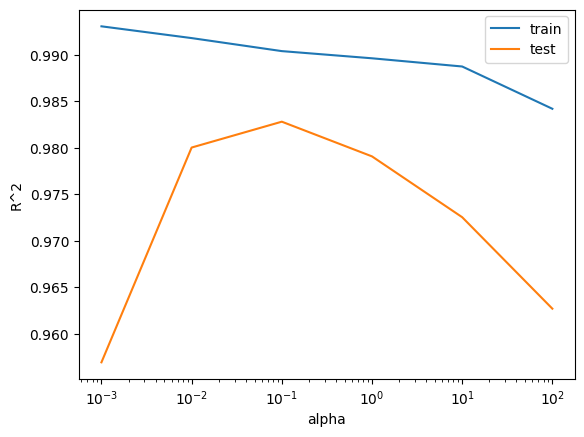

In [40]:
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend(['train', 'test'])
plt.show()

알파(alpha) 값이 0.1 일때 테스트 세트의 점수가 가장 높고 훈련 세트 그래프와의 격차도 적어지는 모습

In [43]:
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


# 라쏘 회귀

In [46]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


In [47]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  # 라쏘 모델 생성
  lasso = Lasso(alpha=alpha, max_iter=10000)
  # 라쏘 모델 훈련
  lasso.fit(train_scaled, train_target)
  # 훈련 점수와 테스트 점수 저장
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


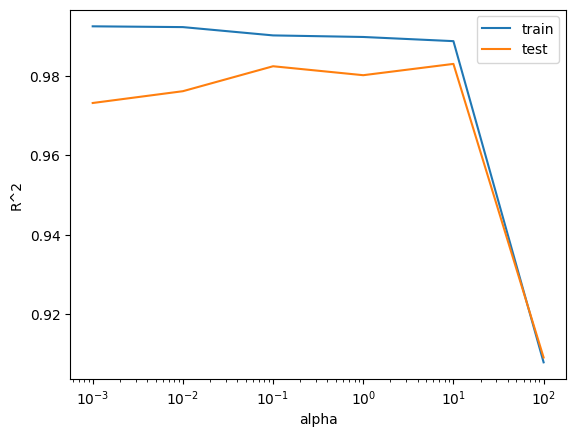

In [48]:
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend(['train', 'test'])
plt.show()

In [49]:
lasso = Lasso(alpha= 10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695
